In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

Using TensorFlow backend.


2.0.0
2.3.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub # can pip install tensorflow_hub

In [3]:
# getting data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
# cat= photo
# dogs= Signature

In [5]:
train_cats = os.path.join(train_dir, 'photo')
train_dogs = os.path.join(train_dir, 'signature')
validation_cats = os.path.join(validation_dir, 'photo')
validation_dogs = os.path.join(validation_dir, 'signature')

In [6]:
num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))
#print(num_dogs_val)

In [7]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input

In [9]:
#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 1500 images belonging to 2 classes.


In [11]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')


Found 500 images belonging to 2 classes.


In [12]:
# model

# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))


In [13]:
mobile_net.trainable = False

model = tf.keras.models.Sequential([
    mobile_net,
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    ])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
EPOCHS = 5

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Epoch 1/5
300/300 [==============================] - 439s 1s/step - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/5
300/300 [==============================] - 432s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 8.4895e-04 - val_accuracy: 1.0000
Epoch 3/5
300/300 [==============================] - 428s 1s/step - loss: 5.8505e-04 - accuracy: 1.0000 - val_loss: 5.4732e-04 - val_accuracy: 1.0000
Epoch 4/5
300/300 [==============================] - 413s 1s/step - loss: 3.6230e-04 - accuracy: 1.0000 - val_loss: 4.0434e-04 - val_accuracy: 1.0000
Epoch 5/5
300/300 [==============================] - 430s 1s/step - loss: 2.5103e-04 - accuracy: 1.0000 - val_loss: 3.1097e-04 - val_accuracy: 1.0000


In [16]:
print("Saving model to disk.....")
model.save("sign_classifier_mobileNet_v2.h5")
print("Sucessfully Saved model to disk")

Saving model to disk.....
Sucessfully Saved model to disk


In [17]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

Text(0.5, 1.0, 'Training and Validation Accuracy')

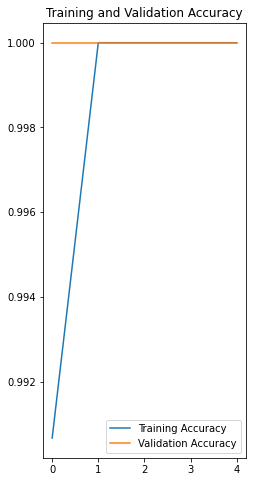

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

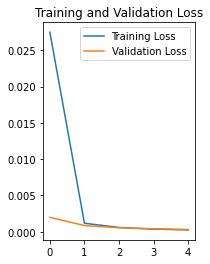

In [21]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
#res = load_model('sign_classifier_mobileNet_v2.h5')
res = tf.keras.models.load_model('sign_classifier_mobileNet_v2.h5',custom_objects={'KerasLayer':hub.KerasLayer})
res.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Murugan\\Desktop\\class_test\\ccc.jpg', target_size = (IMG_SHAPE, IMG_SHAPE))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = res.predict(test_image)
#training_set.class_indices
print(result)
print()
if result[0][0] == 1:
    prediction = 'photo'
    print(prediction)
else:
    prediction = 'signature'
    print(prediction)

[[0.0168501  0.98314995]]

signature
